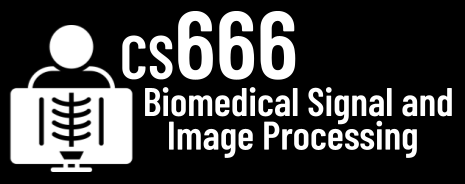
#Assignment 2

In [1]:
### TODO: YOUR NAME

In [2]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 89.1 MB/s eta 0:00:00


In [4]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [5]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 379GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** Analyze the data. [20 Points]


In [6]:
# How many EEG channels were used when acquiring the data?
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER
# Load the data
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif'))

# Get the number of EEG channels
eeg_channels = [ch_name for ch_name in raw.ch_names if 'EEG' in ch_name]
num_eeg_channels = len(eeg_channels)

# Print the result
print(f"The number of EEG channels is {num_eeg_channels}.")


Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
The number of EEG channels is 60.


In [ ]:
# TODO What is the sampling frequency of this data?
# TODO: YOUR ANSWER

In [7]:
# TODO What is the total duration of the measurement?
# TODO: YOUR ANSWER
# Load the data
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif'))

# Get the sampling frequency
sfreq = raw.info['sfreq']

# Print the result
print(f"The sampling frequency of the data is {sfreq} Hz.")


Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
The sampling frequency of the data is 600.614990234375 Hz.


**Task 2:** Let's look at some channels! [20 Points]

Using matplotlib as 2D backend.


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


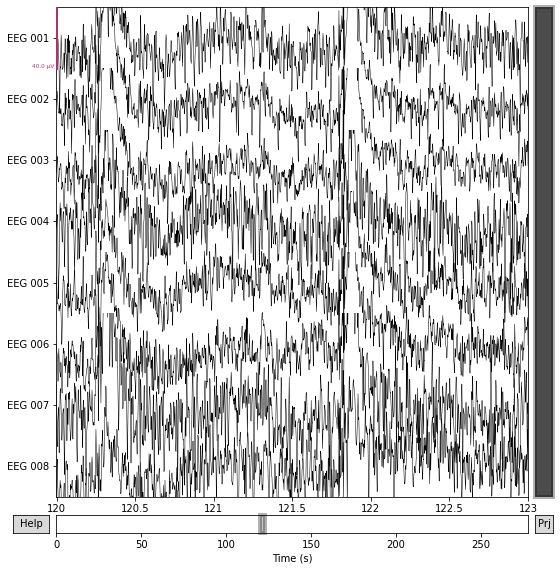

In [8]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


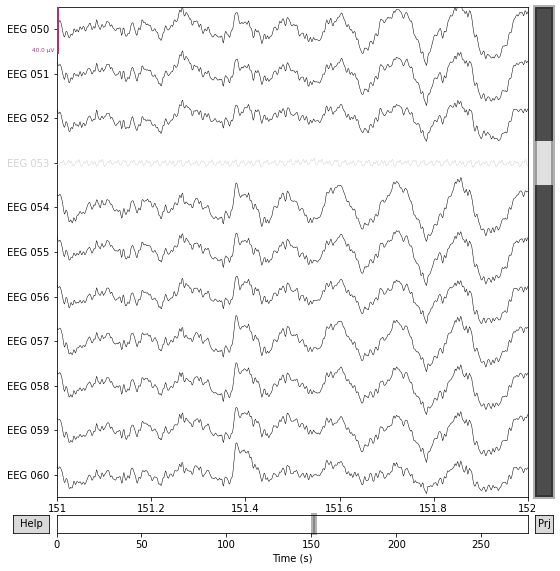

In [9]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.
# Select the channel names and indices
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]

# Plot the EEG channels
eeg50to60 = raw.plot(order=chan_idxs, start=151, duration=1)


In [10]:
# TODO: Do you see a bad channel? If yes, which one?
# TODO: YOUR_ANSWER
# Load the data
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif'))

# Get a list of bad channels
bad_channels = raw.info['bads']

# Print the result
if len(bad_channels) > 0:
    print(f"The following channels were marked as bad: {bad_channels}")
else:
    print("No channels were marked as bad.")


Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
The following channels were marked as bad: ['MEG 2443', 'EEG 053']


**Task 3:** How long between event and brain activity? [25 Points]

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


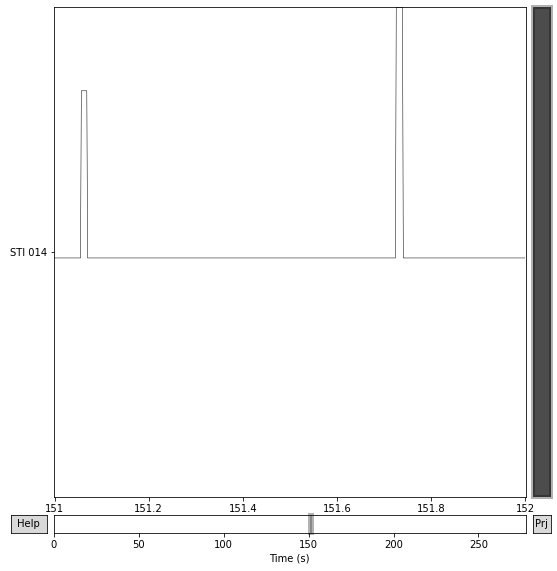

In [11]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

In [13]:
import plotly.graph_objs as go

# Define the channels to plot
eeg_chs = ['EEG {:03d}'.format(i) for i in range(50, 61)]
stim_ch = 'STI 014'

# Get the indices of the channels
eeg_idx = [raw.ch_names.index(ch) for ch in eeg_chs]
stim_idx = raw.ch_names.index(stim_ch)

# Define the time window to plot
tmin = 151
tmax = tmin + 1

# Extract the data
eeg_data, _ = raw[eeg_idx, tmin:tmax]
stim_data, _ = raw[stim_idx, tmin:tmax]

# Create a plot with two traces
fig = go.Figure()

# Add the EEG trace to the plot
for i, ch in enumerate(eeg_chs):
    fig.add_trace(go.Scatter(x=raw.times[tmin:tmax], y=eeg_data[i],
                             name=ch))

# Add the stimulus trace to the plot
fig.add_trace(go.Scatter(x=raw.times[tmin:tmax], y=stim_data[0],
                         name=stim_ch, line=dict(color='red')))

# Set the plot title
fig.update_layout(title='EEG Channels 50-60 and Stimulus Channel')

# Label the x-axis
fig.update_xaxes(title_text='Time (s)')

# Label the y-axis
fig.update_yaxes(title_text='Amplitude')

# Show the plot
fig.show()



In [ ]:
# TODO How many stimulus events do you observe?
# TODO: YOUR_ANSWER

In [14]:
events = mne.find_events(raw, stim_channel='STI 014')
n_events = len(events)
print(f'Number of stimulus events: {n_events}')


320 events found
Event IDs: [ 1  2  3  4  5 32]
Number of stimulus events: 320


In [ ]:
# TODO Please estimate the time between the first stimulus and brain activity response.
# TODO: YOUR_ANSWER

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
72 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated


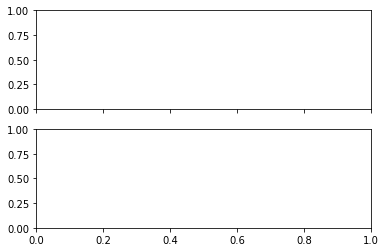

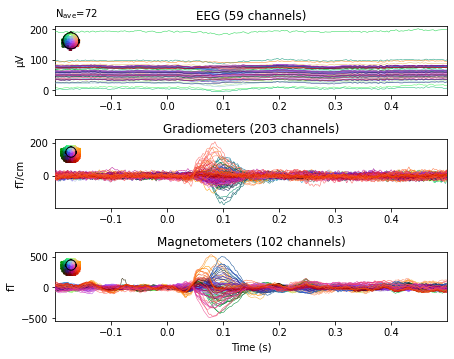

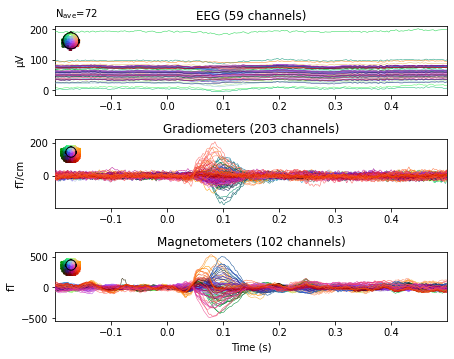

In [15]:
events = mne.find_events(raw, stim_channel='STI 014')
event_id = {'Smiley': 1}
tmin, tmax = -0.2, 0.5
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None)
evoked = epochs.average()
evoked.plot()



**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [29]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


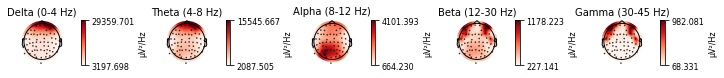

In [30]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


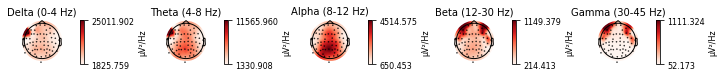

In [31]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [ ]:
# TODO Please visualize the average brain activity when the subject pushes the button

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


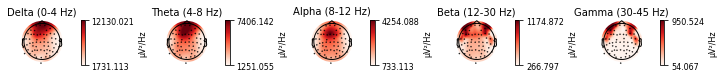

In [33]:
button_epochs = epochs['button'].plot_psd_topomap()

In [ ]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO: YOUR ANSWER

In [ ]:
# Based on the plots, there are some differences in the frequency ranges where we observe activity for the visual/right, face, and button events. 
# The visual/right and face events show activity in higher frequency ranges (gamma band), while the button event seems to show more activity in lower frequency ranges (alpha and beta bands).
# The button event seems to show activity in the motor cortex region, which is responsible for planning and executing voluntary movements. 
# This makes sense, since the button press requires a motor response. On the other hand, the visual/right and face events may involve more visual processing regions of the brain, 
# which would explain why we see more activity in higher frequency ranges.

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [ ]:
# TODO Please go back to Task 3. Can you figure out which event types happened?

In [ ]:
# In Task 3, we only see one event type with ID 1 and label 'Smiley'. 
# This suggests that the data we are working with may be from an experiment where only one type of stimulus was presented to the subject, possibly with the intention of observing a specific response or activity pattern in the brain.
# It is also possible that the stimulus was designed to be ambiguous or open-ended, allowing the subject to interpret it in different ways, which could make it difficult to assign a specific label to
# the event. 
# Without more information about the experimental design and goals, it is difficult to say for certain what the event represents.

In [ ]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#